In [1]:
#importig necesssary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [2]:
#importing data set
CHP=pd.read_excel(r"C:\Users\ADMIN\Desktop\Data Scientist\Machine Learning\Practise project\Practise project 1- California housing price\1553768847_housing.xlsx")

## Exploratory Data Analysis 

In [3]:
CHP.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [4]:
CHP.tail(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_proximity  \
20635         845         330         1.5603          INLAND   
20636         356         114         2.5568          INLAND   
20637        1007         433         1.7000          INLAND   
20638         741         349         1.8672          INLAND   
20639        1387         530         2.3886          INLAND   

       median_house_value  
20635               78100  
20636               77100  
20637               92300  
20638               84700  
20639               89400

In [5]:
CHP.shape

(20640, 10)

In [6]:
type(CHP)

pandas.core.frame.DataFrame

In [7]:
CHP.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [8]:
CHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
CHP.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [10]:
CHP.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [11]:
CHP[['median_house_value']]

median_house_value
0                  452600
1                  358500
2                  352100
3                  341300
4                  342200
...                   ...
20635               78100
20636               77100
20637               92300
20638               84700
20639               89400

[20640 rows x 1 columns]

Clearly median house value(target variable) is numerical in data so it's a regression problem

In [12]:
CHP[['ocean_proximity']]

ocean_proximity
0            NEAR BAY
1            NEAR BAY
2            NEAR BAY
3            NEAR BAY
4            NEAR BAY
...               ...
20635          INLAND
20636          INLAND
20637          INLAND
20638          INLAND
20639          INLAND

[20640 rows x 1 columns]

This column only has categorical values 

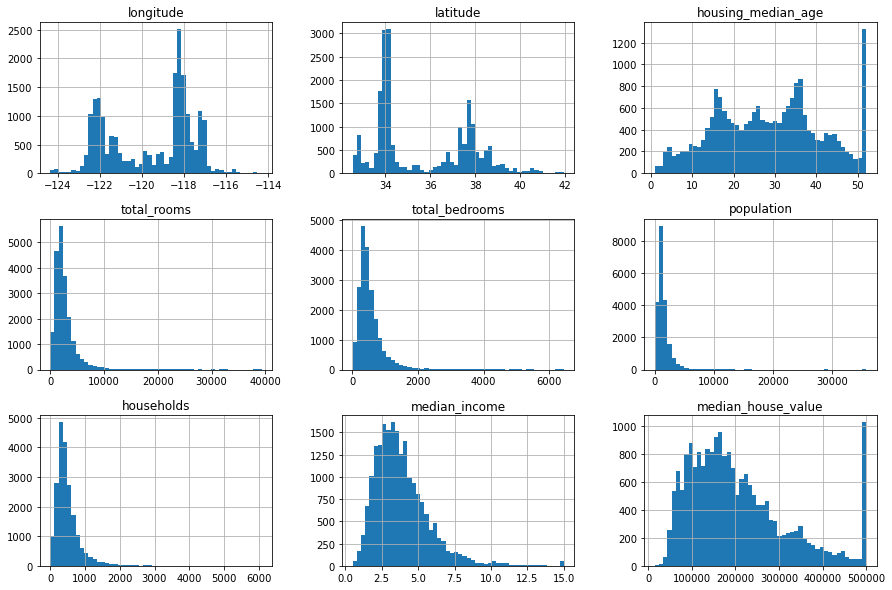

In [13]:
CHP.hist(figsize=(15,10),bins=50);

<Figure size 432x288 with 0 Axes>

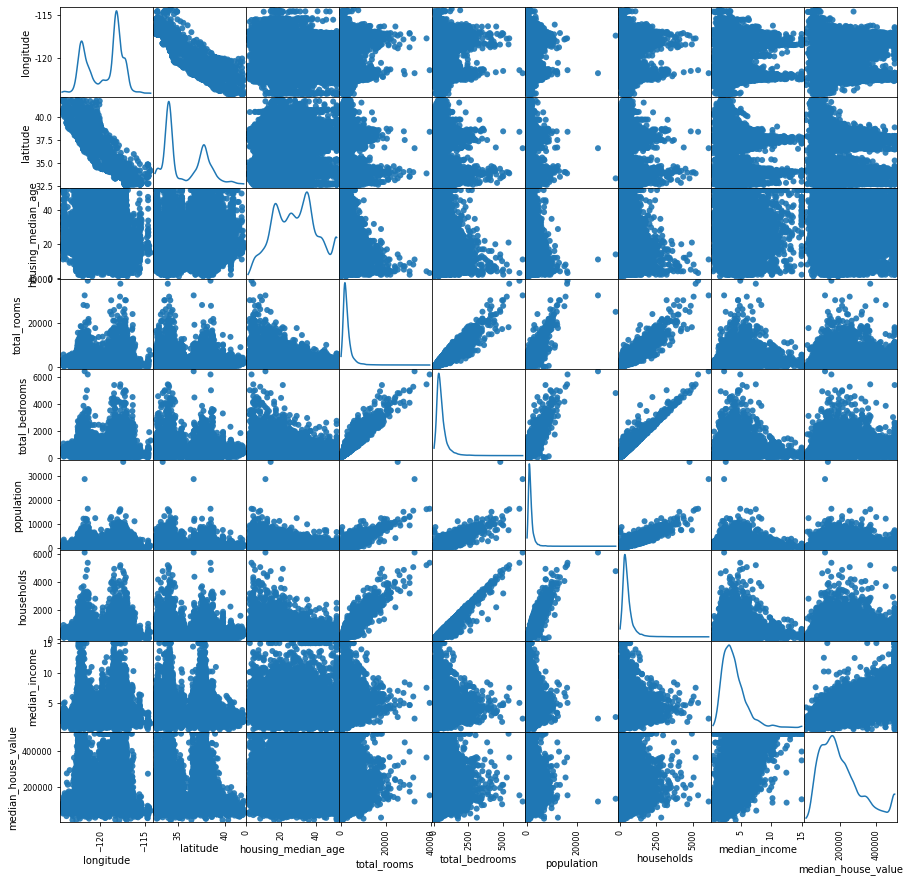

In [14]:
#display scatter_matrix also
fig = plt.figure()
scatter_matrix(CHP,figsize =(15,15),alpha=0.9,diagonal="kde",marker="o");

In [15]:
import pandas_profiling
pandas_profiling.ProfileReport(CHP)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

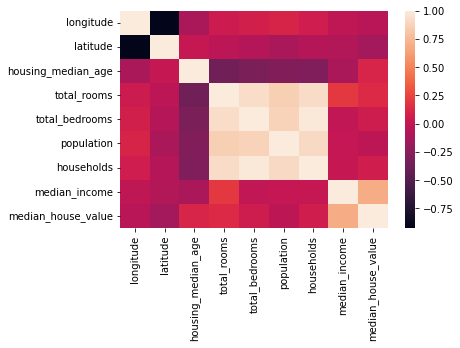

In [16]:
sns.heatmap(CHP.corr())

In [17]:
CHPcorr = CHP.corr()
CHPcorr.style.background_gradient()

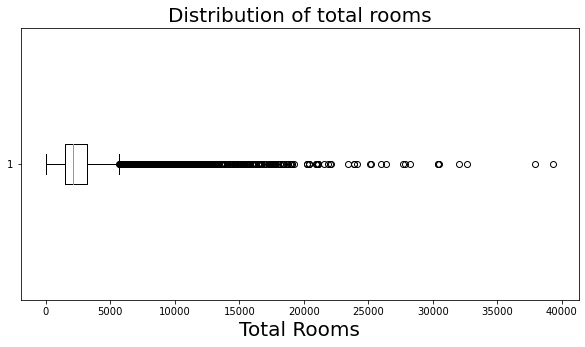

In [18]:
# plot the boxplot to visualize the outliers in total rooms

plt.rcParams["figure.figsize"] = [10,5]

axis = plt.boxplot(CHP.total_rooms, vert = False)
# set the title
plt.title("Distribution of total rooms", fontsize=20)
# set the label for x-axis
plt.xlabel("Total Rooms", fontsize=20)
# display the plot
plt.show()


In [19]:
def getOutliers(dataframe,column):
    column = "total_rooms" 
    des = dataframe[column].describe()
    desdata = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q1 = des[desdata['25']]
    Q3 = des[desdata['75']]
    IQR = Q3-Q1
    lowerBound = Q1-1.5*IQR
    upperBound = Q3+1.5*IQR
    print("(IQR = {})Outlier are anything outside this range: ({},{})".format(IQR,lowerBound,upperBound))
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]

    print("Outliers out of total = {} are \n {}".format(CHP[column].size,len(data[column])))
    #remove the outliers from the dataframe
    outlierRemoved = CHP[~CHP[column].isin(data[column])]
    return outlierRemoved

In [20]:
#get the outliers
df_outliersRemoved = getOutliers(CHP,"total_rooms")

(IQR = 1700.25)Outlier are anything outside this range: (-1102.625,5698.375)
Outliers out of total = 20640 are 
 1287


### Handling missing values 

In [21]:
CHP.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Only total bedrooms is having null values, so we need to fill these null values 

In [22]:
CHP[['total_bedrooms']].describe()

total_bedrooms
count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000

In [23]:
CHP[['total_bedrooms']].mode()

total_bedrooms
0           280.0

In [24]:
CHP[['total_bedrooms']].median()

total_bedrooms    435.0
dtype: float64

array([[<AxesSubplot:title={'center':'total_bedrooms'}>]], dtype=object)

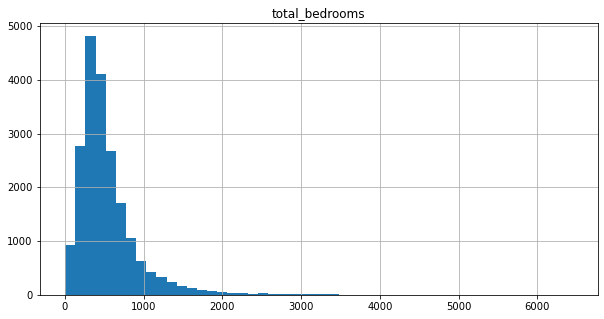

In [25]:
CHP[['total_bedrooms']].hist(figsize=(10,5),bins=50)

In [26]:
#for df in [CHP]:
 #   df['total_bedrooms'].fillna(value='median', inplace=True)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(np.nan,strategy ="median")
imputer.fit(CHP.iloc[:,4:5])
CHP.iloc[:,4:5] = imputer.transform(CHP.iloc[:,4:5])

CHP[['total_bedrooms']].isnull().sum()

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass missing_values=nan as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


total_bedrooms    0
dtype: int64

In [27]:
CHP.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Now there is no null value in the data set

### Convert categorical column (ocean promixity) to numerical using label encoder 

In [28]:
CHP[['ocean_proximity']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ocean_proximity  20640 non-null  object
dtypes: object(1)
memory usage: 161.4+ KB


In [29]:
labelEncoder = LabelEncoder()
CHP["ocean_proximity"] = labelEncoder.fit_transform(CHP["ocean_proximity"])
CHP["ocean_proximity"].value_counts()
CHP.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20640.0     536.838857     419.391878      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
ocean_proximity     20640.0       1.165843       1.420662      0.0000   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         297.0000     435.0000     643.25000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
ocean_proximity          0.0000       1.0000       1.00000       4.0000  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

In [30]:
print(CHP["ocean_proximity"].value_counts())

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64


In [31]:
CHP[['ocean_proximity']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ocean_proximity  20640 non-null  int32
dtypes: int32(1)
memory usage: 80.8 KB


Now there is no categorical value

### Splitting the data into 80% train and 20% test data set

In [32]:
# Dropping median house value column as it is our target column
CHP_house = CHP.drop("median_house_value",axis=1)
CHP_house.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  
0         322         126         8.3252                3  
1        2401        1138         8.3014                3  
2         496         177         7.2574                3  
3         558         219         5.6431                3  
4         565         259         3.8462                3

In [33]:
CHP_MHV = CHP["median_house_value"]
print("Medain Housing Values")
print(CHP_MHV.head())

Medain Housing Values
0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64


In [34]:
X_train,X_test,y_train,y_test = train_test_split(CHP_house,CHP_MHV,test_size=0.2,random_state=42)
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                  33         3126           627.0   
8267     -118.16     33.77                  49         3382           787.0   
17445    -120.48     34.66                   4         1897           331.0   
14265    -117.11     32.69                  36         1421           367.0   
2271     -119.80     36.78                  43         2382           431.0   

       population  households  median_income  ocean_proximity  
14196        2300         623         3.2596                4  
8267         1314         756         3.8125                4  
17445         915         336         4.1563                4  
14265        1418         355         1.9425                4  
2271          874         380         3.5542                1

In [35]:
X_test.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                  25         1505           435.0   
3024     -119.46     35.14                  30         2943           435.0   
15663    -122.44     37.80                  52         3830           435.0   
20484    -118.72     34.28                  17         3051           435.0   
9814     -121.93     36.62                  34         2351           435.0   

       population  households  median_income  ocean_proximity  
20046        1392         359         1.6812                1  
3024         1565         584         2.5313                1  
15663        1310         963         3.4801                3  
20484        1705         495         5.7376                0  
9814         1063         428         3.7250                4

In [36]:
y_train.head()

14196    103000
8267     382100
17445    172600
14265     93400
2271      96500
Name: median_house_value, dtype: int64

In [37]:
y_test.head()

20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64

In [38]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 9) and size 148608
X_test shape (4128, 9) and size 37152
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


In [39]:
#Standardize training and test datasets.

# Feature scaling is to bring all the independent variables of dataset into same scale,to avoid any variable dominating  the model. 
# Here we will not  transform the dependent variables.
SS_ind = StandardScaler()
X_train = SS_ind.fit_transform(X_train)
X_test = SS_ind.fit_transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
test data
[[ 0.25541734  0.22194113 -0.30073951 -0.50056608 -0.22621872 -0.02654818
  -0.3578599  -1.14237625 -0.13376479]
 [ 0.02976613 -0.20947715  0.098724    0.15038025 -0.22621872  0.12876364
   0.22245041 -0.69050482 -0.13376479]
 [-1.46454628  1.03788441  1.85636346  0.55190278 -0.22621872 -0.10016419
   1.19995088 -0.18616932  1.2571195 ]
 [ 0.400837   -0.61275946 -0.93988113  0.19926913 -0.22621872  0.2544495
  -0.0070945

### Now perform different algorithms

### 1. Applying Linear Regression

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.


In [43]:
lrmodel = LinearRegression(n_jobs=-1)
#fit the model to the training data 
lrmodel.fit(X_train,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(lrmodel.intercept_))
print("coefficients  are "+str(lrmodel.coef_))

Intercept is 207194.69373788778
coefficients  are [-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]


In [46]:
# Prediction on the test data
pred_y=lrmodel.predict(X_test)
pred_y

array([ 65216.38684803, 156527.53293932, 256036.43954845, ...,
       445583.32304166, 132891.58951119, 177662.64353138])

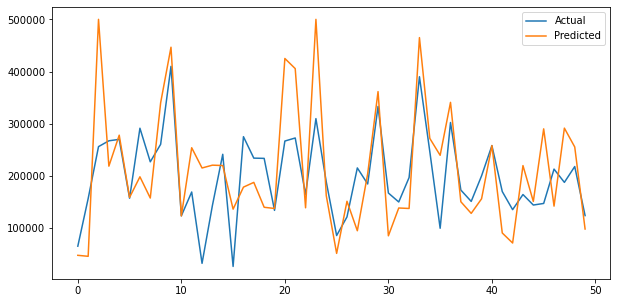

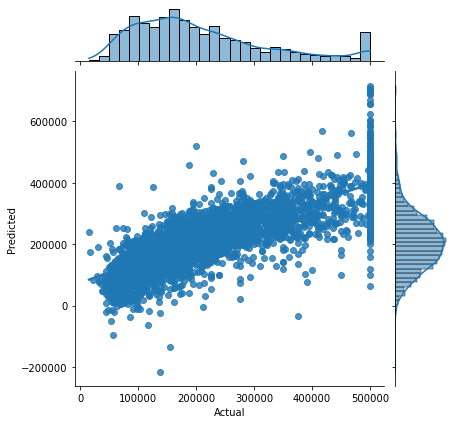

In [63]:
graph_LR = pd.DataFrame({'Predicted':pred_y,'Actual':y_test})
fig= plt.figure(figsize=(10,5))
graph_LR = graph_LR.reset_index()
graph_LR = graph_LR.drop(['index'],axis=1)
plt.plot(graph_LR[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=graph_LR,kind='reg',);

Check Root mean square error (RMSE)  

In [49]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred_y)))
print(np.sqrt(metrics.mean_squared_error(y_train,lrmodel.predict(X_train))))

71210.1854214235
69361.0714290645


### 2. Perform Decision Tree Regression  

Perform Decision Tree Regression on training data.

Predict output for test dataset using the fitted model.

Print root mean squared error from Decision Tree Regression.

In [50]:
DTReg = DecisionTreeRegressor(max_depth=9)
DTReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [51]:
# Prediction on the test data
pred_y_DT=DTReg.predict(X_test)
pred_y_DT

array([ 60503.2556391 ,  75919.52054795, 337288.88888889, ...,
       488611.25      , 110607.93357934, 211563.96963563])

In [53]:
print(len(y_test))
print(len(pred_y_DT))

4128
4128


Check RMSE values 

In [59]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred_y_DT)))
print(np.sqrt(metrics.mean_squared_error(y_train,DTReg.predict(X_train))))

73989.88784219233
50463.306602808174


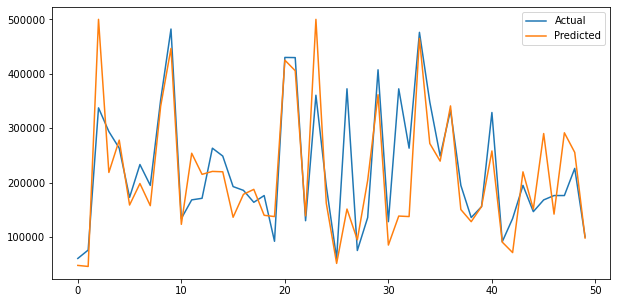

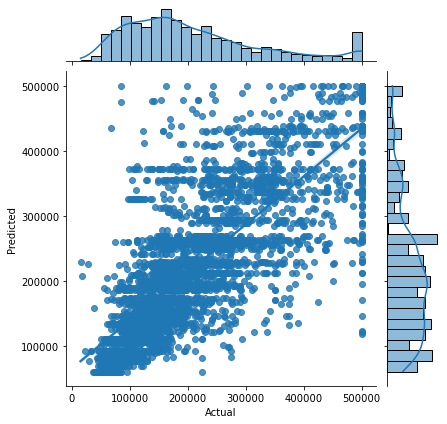

In [64]:
graph_DT = pd.DataFrame({'Predicted':pred_y_DT,'Actual':y_test})
fig= plt.figure(figsize=(10,5))
graph_DT = graph_DT.reset_index()
graph_DT = graph_DT.drop(['index'],axis=1)
plt.plot(graph_DT[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=graph_DT,kind="reg")

### 3. Perform Random Forest Regression 

Perform Random Forest Regression on training data.

Predict output for test dataset using the fitted model.

Print RMSE (root mean squared error) from Random Forest Regression.

In [67]:
RFReg = RandomForestRegressor(30)
RFReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [69]:
pred_y_RF=RFReg.predict(X_test)
pred_y_RF

array([ 50926.66666667,  73650.        , 374766.83333333, ...,
       500001.        ,  89930.        , 154870.        ])

In [70]:
print(len(y_test))
print(len(pred_y_RF))

4128
4128


Check RMSE values

In [71]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred_y_RF)))
print(np.sqrt(metrics.mean_squared_error(y_train,RFReg.predict(X_train))))

63933.01531327764
19515.081627080366


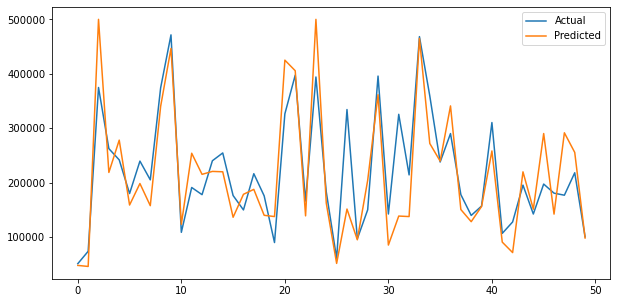

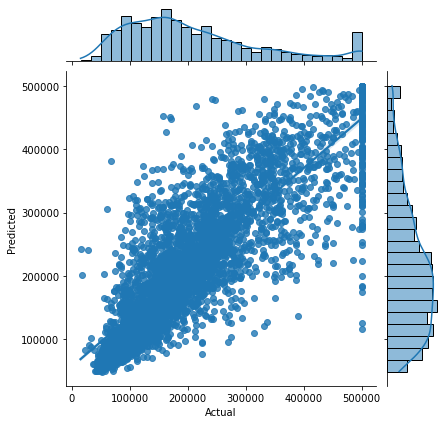

In [74]:
graph_RF = pd.DataFrame({'Predicted':pred_y_RF,'Actual':y_test})
fig= plt.figure(figsize=(10,5))
graph_RF = graph_RF.reset_index()
graph_RF = graph_RF.drop(['index'],axis=1)
plt.plot(graph_RF[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=graph_RF,kind="reg")

### 4. Bonus exercise: Perform Linear Regression with one independent variable  

Extract just the median_income column from the independent variables (from X_train and X_test).

Perform Linear Regression to predict housing values based on median_income.

Predict output for test dataset using the fitted model.

Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [76]:
CHP_med_income=CHP[['median_income']]
CHP_med_income

median_income
0             8.3252
1             8.3014
2             7.2574
3             5.6431
4             3.8462
...              ...
20635         1.5603
20636         2.5568
20637         1.7000
20638         1.8672
20639         2.3886

[20640 rows x 1 columns]

array([[<AxesSubplot:title={'center':'median_income'}>]], dtype=object)

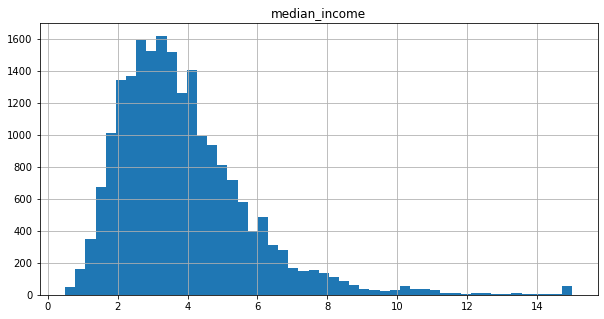

In [96]:
CHP[['median_income']].hist(figsize=(10,5),bins=50)

In [80]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(CHP_med_income,CHP_MHV,test_size=0.2,random_state=42)

In [81]:
print("X_train2 shape {} and size {}".format(X_train2.shape,X_train2.size))
print("X_test2 shape {} and size {}".format(X_test2.shape,X_test2.size))
print("y_train2 shape {} and size {}".format(y_train2.shape,y_train2.size))
print("y_test2 shape {} and size {}".format(y_test2.shape,y_test2.size))

X_train2 shape (16512, 1) and size 16512
X_test2 shape (4128, 1) and size 4128
y_train2 shape (16512,) and size 16512
y_test2 shape (4128,) and size 4128


In [86]:
lrmodel2=LinearRegression()
lrmodel2.fit(X_train2,y_train2)
#print the intercept and coefficients 
print("Intercept is "+str(lrmodel2.intercept_))
print("coefficients  is "+str(lrmodel2.coef_))

Intercept is 44459.729169078724
coefficients  is [41933.84939381]


In [87]:
pred_y2=lrmodel2.predict(X_test2)
pred_y2

array([114958.91676996, 150606.88213964, 190393.71844449, ...,
       431500.77230409, 161245.49973085, 193412.95560084])

In [89]:
print(len(pred_y2))
print(len(y_test2))

4128
4128


In [90]:
print(np.sqrt(metrics.mean_squared_error(y_test2,pred_y2)))
print(np.sqrt(metrics.mean_squared_error(y_train2,lrmodel2.predict(X_train2))))

84209.01241414454
83614.87409655548


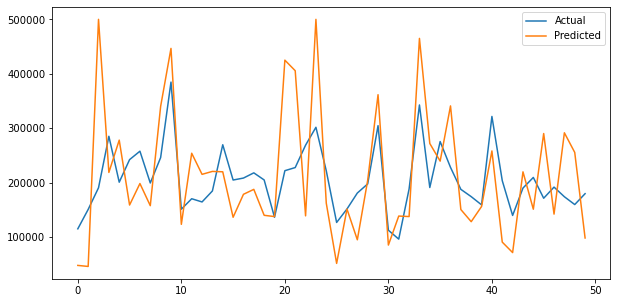

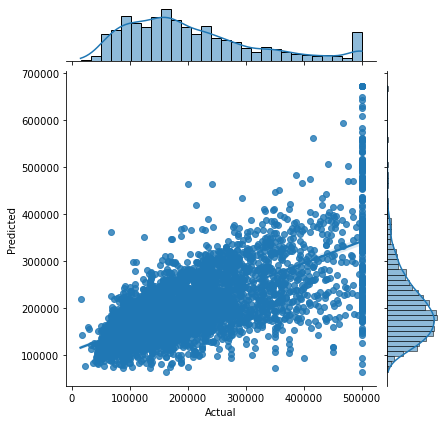

In [92]:
graph_LR2 = pd.DataFrame({'Predicted':pred_y2,'Actual':y_test2})
fig= plt.figure(figsize=(10,5))
graph_LR2 = graph_LR2.reset_index()
graph_LR2 = graph_LR2.drop(['index'],axis=1)
plt.plot(graph_LR2[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=graph_LR2,kind="reg")

Text(0, 0.5, ' Predicted median_house_value')

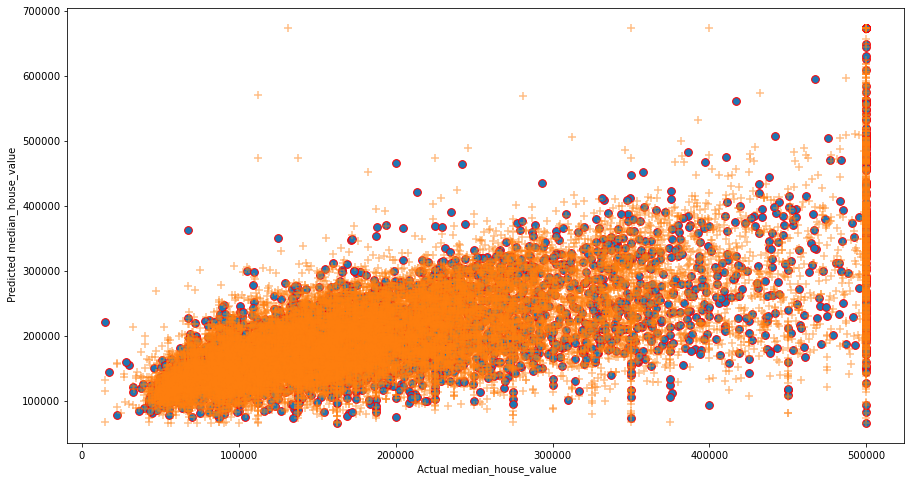

In [94]:
fig = plt.figure(figsize=(15,8))
plt.scatter(y_test2,pred_y2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,lrmodel2.predict(X_train2),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")